In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as T

In [2]:
transform = T.Compose(
[
 T.ToTensor(),
 T.Normalize((0.1307), (0.3081)),
 T.Resize((32,32))
]
)

In [3]:
trainset = torchvision.datasets.MNIST(root = './data', train = True,
                                      transform = transform, download = True)
testset = torchvision.datasets.MNIST(root = './data', train = False,
                                      transform = transform, download = True)

In [4]:
from torch.utils.data import DataLoader

In [5]:
trainloader = DataLoader(trainset, batch_size = 64, shuffle = True)
testloader = DataLoader(testset, batch_size = 64, shuffle = True)

##Ejemplos

In [6]:
ejem = enumerate(testloader)
lote_idx, (ejem_data, ejem_targets) = next(ejem)

In [7]:
ejem_data.shape

torch.Size([64, 1, 32, 32])

In [8]:
ejem_targets.shape

torch.Size([64])

In [9]:
ejem_data[0][0].shape

torch.Size([32, 32])

**Visualizando datos de entrenamiento**

In [10]:
def imshow(imgs, targets):
    fig = plt.figure()
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.tight_layout()
        plt.imshow(imgs[i][0], cmap = 'gray')
        plt.title("Numero real: {}".format(targets[i]))
        plt.xticks([])
        plt.yticks([])
    fig 

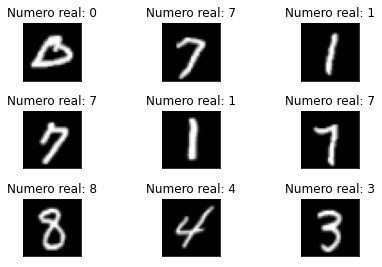

In [11]:
imshow(ejem_data, ejem_targets)

In [12]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


##**Construyendo el modelo**

In [13]:
from torch.nn.modules.activation import Softmax
class lenet5(nn.Module):
  def __init__(self):
     super(lenet5, self).__init__()
     self.capa1 = nn.Sequential(
         nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=0),
         nn.Tanh()
     )
     self.capa_pooling = nn.Sequential( #Esta es la capa 2 y 4
         nn.AvgPool2d(kernel_size=2, stride=2),
         nn.Tanh()
     )
     self.capa3 = nn.Sequential(
         nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0),
         nn.Tanh()
     )
     self.capa5_fc = nn.Sequential(
         nn.Linear(400, 120),
         nn.Tanh()
     )
     self.capa6_fc = nn.Sequential(
         nn.Linear(120, 84),
         nn.Tanh(),
         nn.Linear(84, 10),
         nn.Tanh(),
         nn.Softmax(dim=-1)
     )

  def forward(self, x):
    x = self.capa1(x)   #Capa1
    x = self.capa_pooling(x)  #Capa2
    x = self.capa3(x) #capa3
    x = self.capa_pooling(x) #capa4
    #x = x.view(-1, 16*5*5)  #Aplastanto a x Solo funciona cunado no usamos batch grandes
    x = torch.flatten(x,1)
    x = self.capa5_fc(x)
    x = self.capa6_fc(x)
    return(x)


In [14]:
ejem_data[0].shape

torch.Size([1, 32, 32])

In [15]:
model = lenet5()

In [16]:
pred = model(ejem_data)
pred

tensor([[0.1018, 0.0942, 0.0978, 0.1022, 0.1129, 0.0967, 0.1009, 0.1017, 0.0991,
         0.0927],
        [0.1042, 0.0903, 0.0991, 0.1015, 0.1139, 0.0984, 0.0983, 0.1030, 0.1020,
         0.0892],
        [0.1049, 0.0923, 0.0979, 0.1006, 0.1117, 0.0979, 0.0960, 0.1031, 0.1024,
         0.0933],
        [0.1044, 0.0922, 0.0972, 0.1059, 0.1136, 0.0968, 0.0992, 0.1002, 0.1005,
         0.0900],
        [0.1047, 0.0936, 0.0973, 0.1027, 0.1125, 0.0961, 0.0952, 0.1027, 0.1022,
         0.0930],
        [0.1047, 0.0940, 0.0992, 0.1001, 0.1123, 0.0968, 0.0951, 0.1012, 0.1045,
         0.0921],
        [0.1003, 0.0923, 0.1006, 0.1028, 0.1177, 0.0929, 0.0964, 0.1035, 0.1008,
         0.0928],
        [0.1082, 0.0899, 0.0984, 0.1016, 0.1117, 0.0957, 0.0988, 0.1030, 0.1001,
         0.0925],
        [0.1033, 0.0905, 0.0991, 0.1046, 0.1165, 0.0929, 0.0969, 0.1032, 0.1003,
         0.0927],
        [0.1010, 0.0894, 0.1014, 0.1016, 0.1161, 0.0977, 0.0958, 0.1034, 0.1024,
         0.0911],
        [0

In [17]:
print(f"Model structure: {model}\n\n")

Model structure: lenet5(
  (capa1): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
  )
  (capa_pooling): Sequential(
    (0): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (1): Tanh()
  )
  (capa3): Sequential(
    (0): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
  )
  (capa5_fc): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): Tanh()
  )
  (capa6_fc): Sequential(
    (0): Linear(in_features=120, out_features=84, bias=True)
    (1): Tanh()
    (2): Linear(in_features=84, out_features=10, bias=True)
    (3): Tanh()
    (4): Softmax(dim=-1)
  )
)




In [18]:
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Layer: capa1.0.weight | Size: torch.Size([6, 1, 5, 5]) | Values : tensor([[[[-0.0225,  0.0227,  0.0131,  0.1942,  0.1616],
          [ 0.1271, -0.1918,  0.0635, -0.0281, -0.1609],
          [-0.1934,  0.1406,  0.0379, -0.0300, -0.1785],
          [-0.1118, -0.0300,  0.0711, -0.0811,  0.1089],
          [-0.0219,  0.0781,  0.1257, -0.0202,  0.1892]]],


        [[[-0.0745,  0.1311,  0.1588, -0.0688,  0.1991],
          [ 0.0517,  0.1352,  0.0719, -0.1982, -0.0809],
          [-0.0089, -0.0854, -0.0630,  0.1143, -0.1122],
          [ 0.0833,  0.0096, -0.1314,  0.0339,  0.1414],
          [-0.1920, -0.0970, -0.0501, -0.0216,  0.1958]]]],
       grad_fn=<SliceBackward0>) 

Layer: capa1.0.bias | Size: torch.Size([6]) | Values : tensor([0.1899, 0.0093], grad_fn=<SliceBackward0>) 

Layer: capa3.0.weight | Size: torch.Size([16, 6, 5, 5]) | Values : tensor([[[[-0.0544,  0.0482,  0.0218, -0.0151,  0.0801],
          [ 0.0081, -0.0603,  0.0434, -0.0560, -0.0272],
          [ 0.0540, -0.0441,  0.0

#Funciones para entrenar y validar

In [19]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            correct = (pred.argmax(1) == y).type(torch.int).sum().item()
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}] pred_corrects: {correct}/{len(X)} in batch: {batch}")


def test_loop(dataloader, model, loss_fn):
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correctos = correct
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f}, corrects: {correctos}/{size} \n")

In [20]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001,)

epochs = 100
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(trainloader, model, loss_fn, optimizer)
    test_loop(testloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.304027  [    0/60000] pred_corrects: 4/64 in batch: 0
loss: 2.032816  [ 6400/60000] pred_corrects: 59/64 in batch: 100
loss: 2.014316  [12800/60000] pred_corrects: 58/64 in batch: 200
loss: 2.011976  [19200/60000] pred_corrects: 56/64 in batch: 300
loss: 1.992288  [25600/60000] pred_corrects: 60/64 in batch: 400
loss: 2.004446  [32000/60000] pred_corrects: 58/64 in batch: 500
loss: 1.992469  [38400/60000] pred_corrects: 59/64 in batch: 600
loss: 1.980657  [44800/60000] pred_corrects: 61/64 in batch: 700
loss: 1.976975  [51200/60000] pred_corrects: 62/64 in batch: 800
loss: 1.973740  [57600/60000] pred_corrects: 63/64 in batch: 900
Test Error: 
 Accuracy: 97.1%, Avg loss: 1.973331, corrects: 9710.0/10000 

Epoch 2
-------------------------------
loss: 1.974104  [    0/60000] pred_corrects: 62/64 in batch: 0
loss: 1.974289  [ 6400/60000] pred_corrects: 62/64 in batch: 100
loss: 1.966205  [12800/60000] pred_corrects: 63/64 in batch: 200
loss

In [21]:
def imshowpred(imgs, pred):
    fig = plt.figure()
    for i in range(20):
        plt.subplot(5,4, i+1)
        plt.tight_layout()
        plt.imshow(imgs[i][0], cmap = 'gray')
        plt.title("{}".format(pred[i].item()))
        plt.xticks([])
        plt.yticks([])
    fig

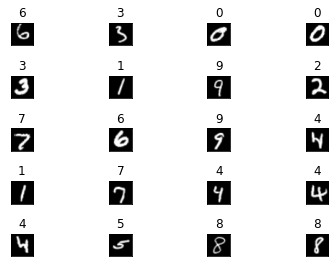

In [40]:
lote_idx, (ejem_data, ejem_targets) = next(ejem)
pred = model(ejem_data)
pred = pred.argmax(1)
imshowpred(ejem_data, pred)

In [36]:
torch.save(model.state_dict(), 'model_weights.pth')